# **Исключения в Python**

**Ошибка** — это неправильное или неточное действие, в результате которого ваша программа либо не запускается вовсе, либо выдает неправильный ответ.

**Типы ошибок:**
* *Синтаксическая ошибка*. Возникает при неправильном использовании синтаксиса. *Python* выдает информацию об ошибке сразу, не выполняя ничего. Распространённые типы ошибок: IndentationError, SyntaxError.
* *Исключения*. События, возникающие  во время исполнения программы, нарушающие нормальный ход выполнения. Возникают **во время** работы программы.
* *Логические ошибки*. Если ответ программы не совпадает с ожидаемым. Как правило, вина самого программиста.

В *Python* исключение — это объект, производный от класса *BaseException*, содержащий информацию об ошибке, произошедшей в вашей программе. Объект исключения включает в себя тип ошибки, состояние программы в момент возникновения ошибки и сообщение об ошибке (которое описывает событие ошибки). Ошибки образуют *иерархию* (см. картинку ниже), обработка более высокой в иерархии ошибки обрабатывает все наследующиеся от неё.

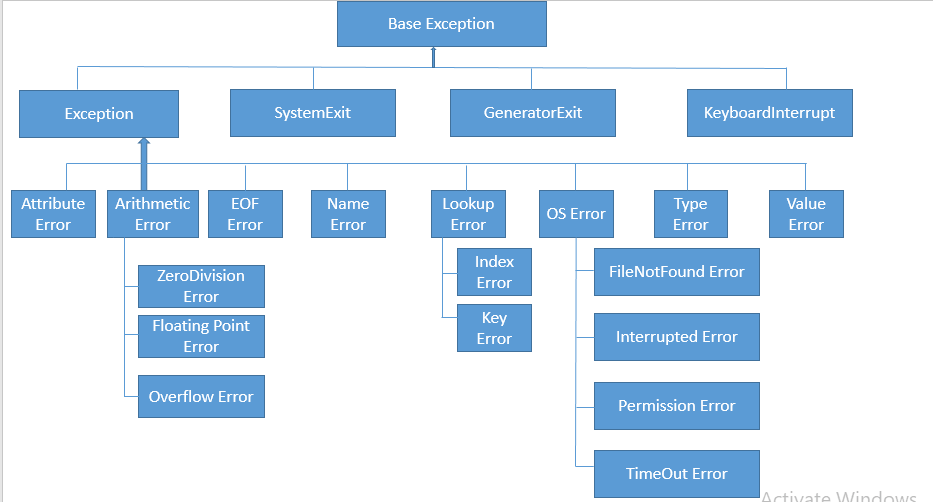

Исключения можно обрабатывать при помощи блока `try-except-else-finally`, а также вызывать самостоятельно при помощи инструкции `raise`.

In [ ]:
# пример обработки исключения
print(1)
print(2)
try:
    print(3)
    print(1/0)
    print(4)
except ZeroDivisionError:
    print('Ошибка деления на ноль!')
print(5)

# 1
# 2
# 3
# Ошибка деления на ноль!
# 5

In [ ]:
# пример вызова исключения
try:
    number = int(input())
except:
    raise ValueError('Неправильный тип данных') # вызовется при введении типа данных, отличного от int

# **Распространение исключений**

Если исключение вызывается из функции, которая вложена в другую функцию, то его можно отследить и перехватить в обеих (работает и с большим числом функций). Желательно обрабатывать исключения там, где они появляются, иначе блок кода может не отработать (см. примеры).

In [ ]:
# пример распространения исключения
def second_func():
    print('Начало работы функции second_func')
    1/0
    print('Конец работы функции second_func')


def first_func():
    print('Начало работы функции first_func')
    second_func()
    print('Конец работы функции first_func')


print(1)
print(2)
first_func()
print(3) # не отработает

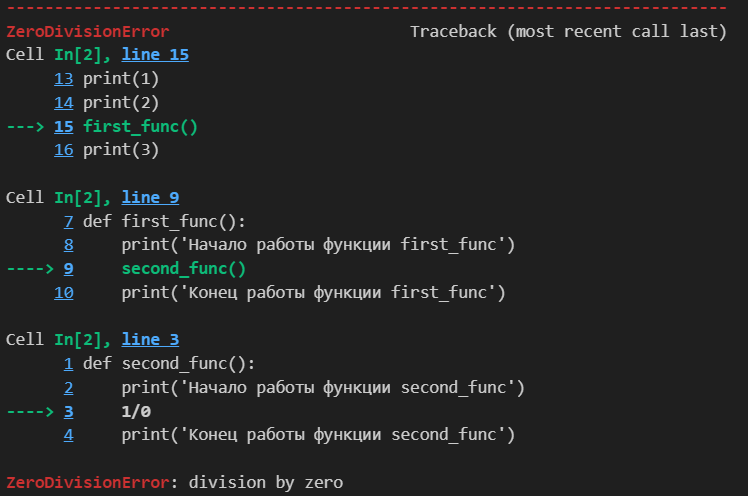

In [ ]:
# пример обработки исключения во вложенной функции
def first_func():
    print('Начало работы функции first_func')
    try:
        second_func()
    except Exception as ex:
        print(f'Внимание! Обработано исключение: {ex}')
    print('Конец работы функции first_func')


def second_func():
    print('Начало работы функции second_func')
    third_func()
    print('Конец работы функции second_func')


def third_func():
    print('Начало работы функции third_func')
    1 / 0
    print('Конец работы функции third_func')


print(1)
print(2)
first_func()
print(3)

# 1
# 2
# Начало работы функции first_func
# Начало работы функции second_func
# Начало работы функции third_func
# Внимание! Обработано исключение: division by zero
# Конец работы функции first_func
# 3

# программа не отработала до конца

In [ ]:
def first_func():
    print('Начало работы функции first_func')
    try:
        second_func()
    except Exception as ex:
        print(f'Внимание! Обработано исключение: {ex} на уровне first_func')
    print('Конец работы функции first_func')


def second_func():
    print('Начало работы функции second_func')
    try:
        third_func()
    except Exception as ex:
        print(f'Внимание! Обработано исключение: {ex} на уровне second_func')
    print('Конец работы функции second_func')


def third_func():
    print('Начало работы функции third_func')
    try:
        1 / 0
    except Exception as ex:
        print(f'Внимание! Обработано исключение: {ex} на уровне third_func')
    print('Конец работы функции third_func')


print(1)
print(2)
first_func()
print(3)

# 1
# 2
# Начало работы функции first_func
# Начало работы функции second_func
# Начало работы функции third_func
# Внимание! Обработано исключение: division by zero на уровне third_func
# Конец работы функции third_func
# Конец работы функции second_func
# Конец работы функции first_func
# 3

# если обрабатывать там, где надо, всё отработает до конца

# **Обработка исключений `try-except`**

Исключения в *Python* обрабатываются при помощи конструкции `try-exept-finally-else`.

В блок `try` идёт код, где планируется "отлавливать" исключение. В блоке `except` указывается некоторое отлавливаемое исключение и некоторое поведение на случай, если это исключение возникнуть. После возникновения исключения сразу запускается блок `except`, оставшийся код в блоке `try` не выполняется. Блоков `except` может быть сколько угодно.

Блок `finally` отрабатывает в любом случае, вне зависимости, нормально ли выполнился код в блоке `try`, или же было выявлено исключение. Можно использовать комбинацию `try-finally`, в таком случае, ошибка выведется, но код в `finally` всё равно отработает. Блок `finally` может быть только один.

Блок `else` отрабатывает в том случае, если в блоке `try` код отработал нормально (не было выявлено исключений). Блок `else` может быть только один. Для того, чтобы блок `else` нормально функционировал, должен быть хотя бы один `except`.

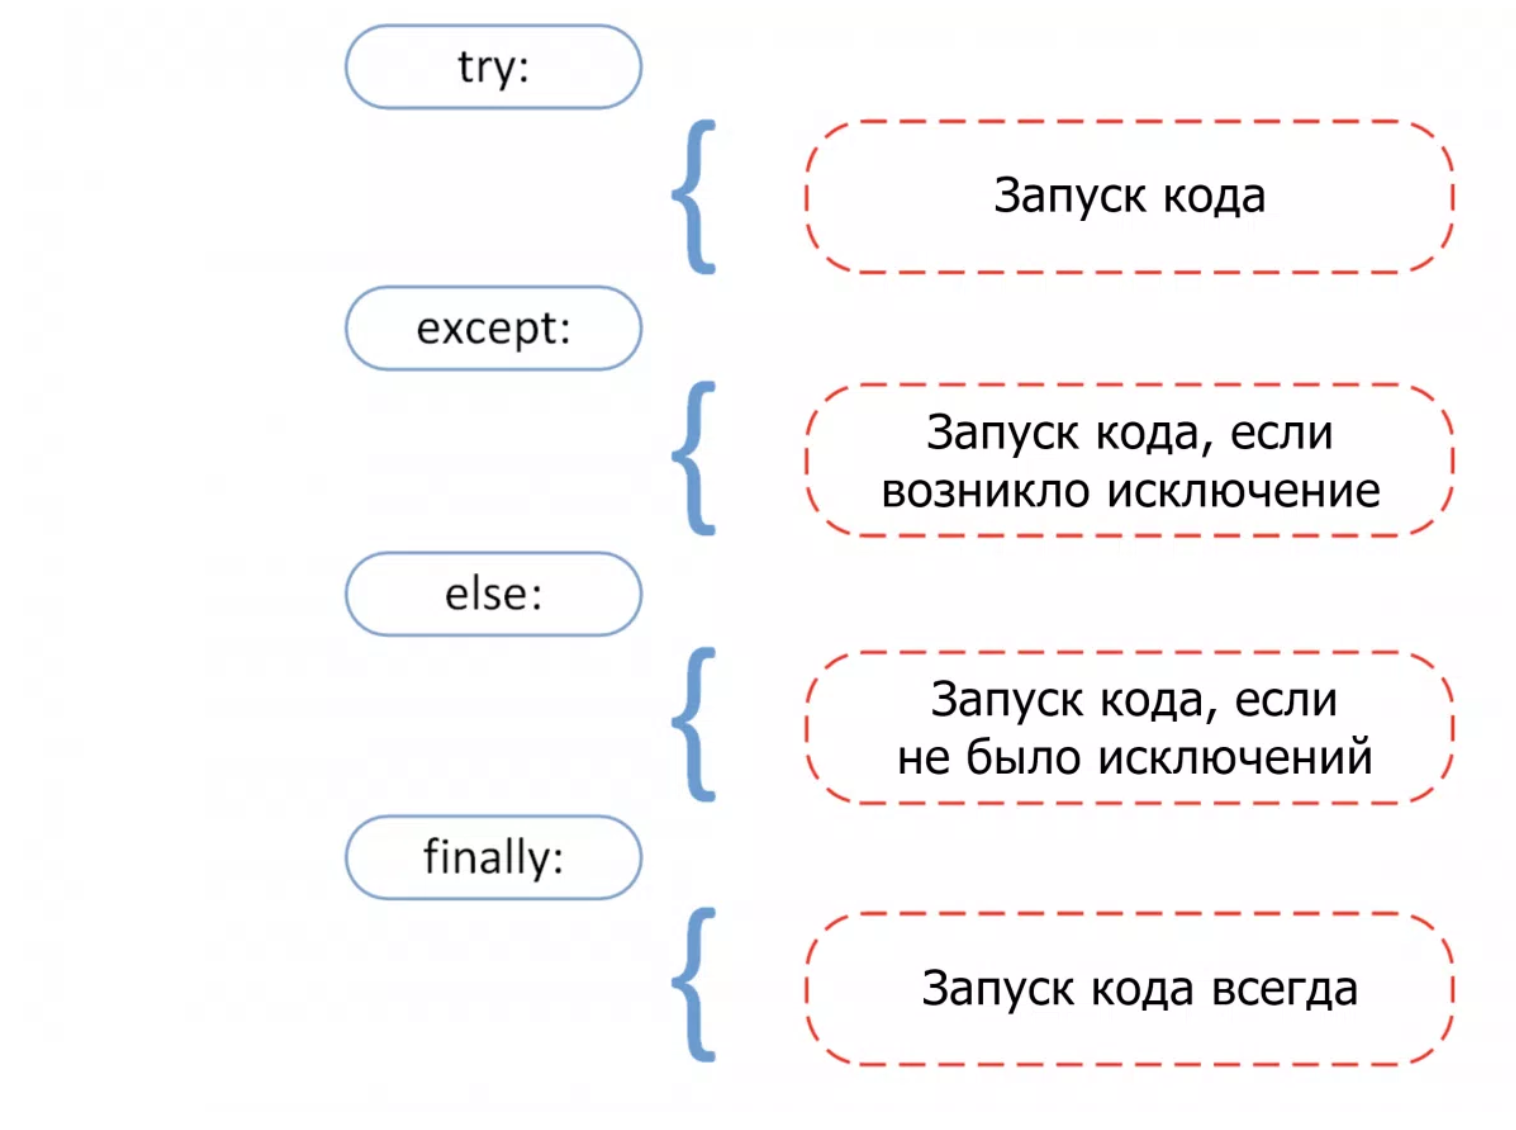

**Примечание:** исключениям можно давать псевдонимы для упрощения последующей обработки (см. пример).

**Примечание 2:** если не указать тип обрабатываемого исключения, в блок `except` пойдут все исключения (но так делать не принято, в крайнем случае - `except Exception`).

In [ ]:
# пример конструкции try-except-else-finally
try:
    1 / 2
    int('12456')
    a + b
except ValueError:
    print('error ValueError')
except ZeroDivisionError:
    print('error ZeroDivisionError')
except NameError:
    print('error NameError')
else:
    print('Good')
finally:
    print('Finally')

# error NameError
# Finally

In [ ]:
# пример назначения исключению псевдонима
try:
    1/0
except ZeroDivisionError as errZD:
    print(errZD) # division by zero
    print(repr(errZD)) # ZeroDivisionError('division by zero')

# пример назначения исключениям псевдонима при множественной обработке
try:
    ''[1]
except (KeyError, IndexError) as errID:
    print(errID) # string index out of range
    print(repr(errID)) # IndexError('string index out of range')